# Partie 2

In [1]:
import numpy as np
import pandas as pd
from scipy.spatial import distance
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


In [2]:
data_path = "../data/"

df_genes_data = pd.read_csv(data_path + "data.csv")
df_genes_labels = pd.read_csv(data_path + "labels.csv")

In [3]:
df_genes_data.head()

Unnamed: 0  gene_0    gene_1    gene_2    gene_3     gene_4  gene_5  \
0   sample_0     0.0  2.017209  3.265527  5.478487  10.431999     0.0   
1   sample_1     0.0  0.592732  1.588421  7.586157   9.623011     0.0   
2   sample_2     0.0  3.511759  4.327199  6.881787   9.870730     0.0   
3   sample_3     0.0  3.663618  4.507649  6.659068  10.196184     0.0   
4   sample_4     0.0  2.655741  2.821547  6.539454   9.738265     0.0   

     gene_6    gene_7  gene_8  ...  gene_20521  gene_20522  gene_20523  \
0  7.175175  0.591871     0.0  ...    4.926711    8.210257    9.723516   
1  6.816049  0.000000     0.0  ...    4.593372    7.323865    9.740931   
2  6.972130  0.452595     0.0  ...    5.125213    8.127123   10.908640   
3  7.843375  0.434882     0.0  ...    6.076566    8.792959   10.141520   
4  6.566967  0.360982     0.0  ...    5.996032    8.891425   10.373790   

   gene_20524  gene_20525  gene_20526  gene_20527  gene_20528  gene_20529  \
0    7.220030    9.119813   12.003135    9.650743    8.921326    5.286759   
1    6.256586    8.381612   12.674552   10.517059    9.397854    2.094168   
2    5.401607    9.911597    9.045255    9.788359   10.090470    1.683023   
3    8.942805    9.601208   11.392682    9.694814    9.684365    3.292001   
4    7.181162    9.846910   11.922439    9.217749    9.461191    5.110372   

   gene_20530  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  

[5 rows x 20532 columns]

In [4]:
df_genes_labels.head()

Unnamed: 0 Class
0   sample_0  PRAD
1   sample_1  LUAD
2   sample_2  PRAD
3   sample_3  PRAD
4   sample_4  BRCA

In [5]:
df_genes_data = df_genes_data.drop(columns=df_genes_data.columns[0])
df_genes_labels = df_genes_labels.drop(columns=df_genes_labels.columns[0])

In [6]:
df_genes_data.head()

gene_0    gene_1    gene_2    gene_3     gene_4  gene_5    gene_6  \
0     0.0  2.017209  3.265527  5.478487  10.431999     0.0  7.175175   
1     0.0  0.592732  1.588421  7.586157   9.623011     0.0  6.816049   
2     0.0  3.511759  4.327199  6.881787   9.870730     0.0  6.972130   
3     0.0  3.663618  4.507649  6.659068  10.196184     0.0  7.843375   
4     0.0  2.655741  2.821547  6.539454   9.738265     0.0  6.566967   

     gene_7  gene_8  gene_9  ...  gene_20521  gene_20522  gene_20523  \
0  0.591871     0.0     0.0  ...    4.926711    8.210257    9.723516   
1  0.000000     0.0     0.0  ...    4.593372    7.323865    9.740931   
2  0.452595     0.0     0.0  ...    5.125213    8.127123   10.908640   
3  0.434882     0.0     0.0  ...    6.076566    8.792959   10.141520   
4  0.360982     0.0     0.0  ...    5.996032    8.891425   10.373790   

   gene_20524  gene_20525  gene_20526  gene_20527  gene_20528  gene_20529  \
0    7.220030    9.119813   12.003135    9.650743    8.921326    5.286759   
1    6.256586    8.381612   12.674552   10.517059    9.397854    2.094168   
2    5.401607    9.911597    9.045255    9.788359   10.090470    1.683023   
3    8.942805    9.601208   11.392682    9.694814    9.684365    3.292001   
4    7.181162    9.846910   11.922439    9.217749    9.461191    5.110372   

   gene_20530  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  

[5 rows x 20531 columns]

In [7]:
df_genes_labels.head()

Class
0  PRAD
1  LUAD
2  PRAD
3  PRAD
4  BRCA

In [8]:
unique_label_dict = {
    'PRAD': 0,
    'LUAD': 1,
    'BRCA': 2,
    'KIRC': 3,
    'COAD': 4
}

In [9]:
df_genes_labels['Class'] = df_genes_labels['Class'].map(unique_label_dict)

In [10]:
df_genes_labels.head(15)

Class
0       0
1       1
2       0
3       0
4       2
5       0
6       3
7       0
8       2
9       0
10      2
11      3
12      0
13      2
14      2

In [11]:
genes_data = df_genes_data.to_numpy()
genes_labels = df_genes_labels.to_numpy()

In [12]:
print("genes_data.shape :", genes_data.shape)
print("genes_labels.shape :", genes_labels.shape)

genes_data.shape : (801, 20531)
genes_labels.shape : (801, 1)


In [13]:
#Méthod ACP

N = 2

pca = PCA(n_components=N)
reduced_data_pca = pca.fit_transform(genes_data)

print(f"Reduced data shape: {reduced_data_pca.shape}")



Reduced data shape: (801, 2)


In [14]:
print("max sur x : ", reduced_data_pca[:, 0].max())
print("min sur x : ", reduced_data_pca[:, 0].min())
print("max sur y : ", reduced_data_pca[:, 1].max())
print("min sur y : ", reduced_data_pca[:, 1].min())

max sur x :  184.20318064011448
min sur x :  -89.76368500205871
max sur y :  126.46164593179076
min sur y :  -150.9967762434913


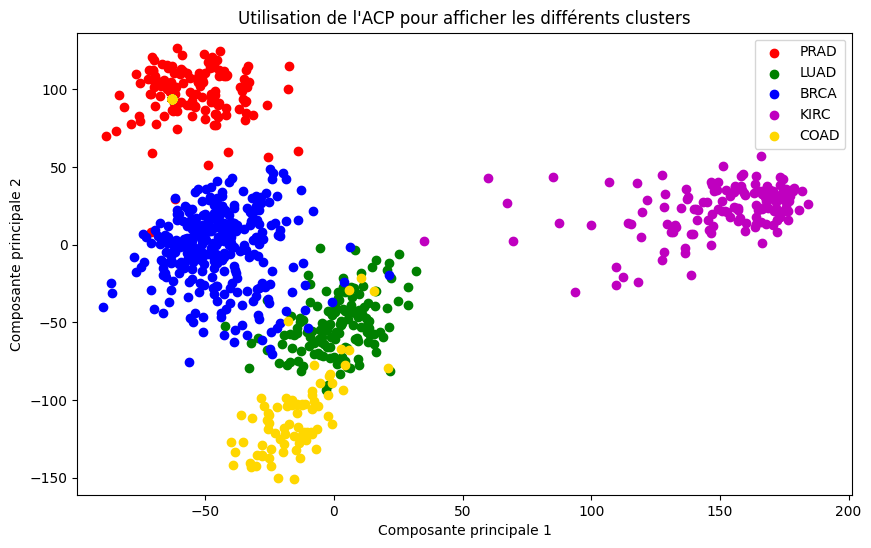

In [15]:
colors = ['r', 'g', 'b', 'm', 'gold']


plt.figure(figsize=(10, 6))
for label in unique_label_dict:
    indices = np.where(genes_labels == unique_label_dict[label] )
    plt.scatter( reduced_data_pca[indices, 0], reduced_data_pca[indices, 1], c = colors[unique_label_dict[label]], label=label )

plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.title('Utilisation de l\'ACP pour afficher les différents clusters')
plt.legend()

plt.xlim( reduced_data_pca[:, 0].min() - 10, reduced_data_pca[:, 1].max() + 75)
plt.ylim( reduced_data_pca[:, 1].min() - 10, reduced_data_pca[:, 1].max() + 10)

plt.savefig('../images_rapport/ACP_cluster.png', bbox_inches='tight')

plt.show()

In [16]:
#Méthode TSNE

tsne = TSNE(n_components=2, random_state=42)
reduced_data_tsne = tsne.fit_transform(genes_data)

print(f"Reduced data shape: {reduced_data_tsne.shape}")

Reduced data shape: (801, 2)


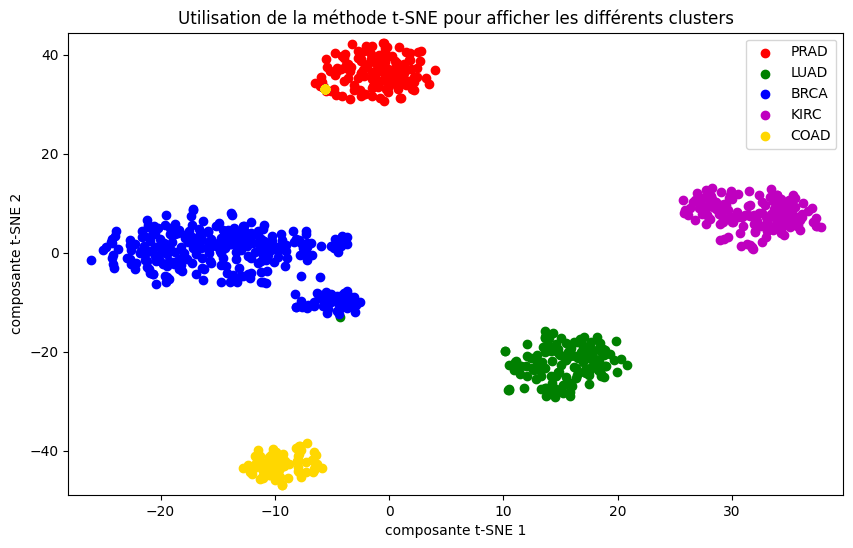

In [17]:

plt.figure(figsize=(10, 6))
for label in unique_label_dict:
    indices = np.where(genes_labels == unique_label_dict[label])
    plt.scatter(reduced_data_tsne[indices, 0], reduced_data_tsne[indices, 1], c=colors[unique_label_dict[label]], label=label)

plt.xlabel('composante t-SNE 1')
plt.ylabel('composante t-SNE 2')
plt.title('Utilisation de la méthode t-SNE pour afficher les différents clusters')
plt.legend()

plt.xlim(reduced_data_tsne[:, 0].min() - 2, reduced_data_tsne[:, 0].max() + 2)
plt.ylim(reduced_data_tsne[:, 1].min() - 2, reduced_data_tsne[:, 1].max() + 2)

plt.savefig('../images_rapport/TSNE_cluster.png', bbox_inches='tight')

plt.show()